## Project -  Big Data Mart Sales 


### Problem Statement:

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

- bigdatamart_Train.csv: Use this file for the model building purpose. 

- bigdatamart_Test.csv: Use this file for getting predictions from the trained model. 



### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import zscore
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### Renaming & calling the dataset happiness_score_dataset as df.

In [2]:
df=pd.read_csv('bigdatamartsales.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


### Checking the data shape

In [3]:
df.shape

(200, 5)

### Obtaining the column names inolved in our dataset.

In [4]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

### Checking the data-types under the respective columns.

In [5]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

### Checking if there are any null values in our dataset.



In [6]:
df.isnull()

,Unnamed: 0,TV,radio,newspaper,sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


Observation :-

There are no rows/columns with null values.

### Adding the total number of null values , if there's any.

In [7]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

There are no null values present in the dataset.

### Visual Representation of Null-Values

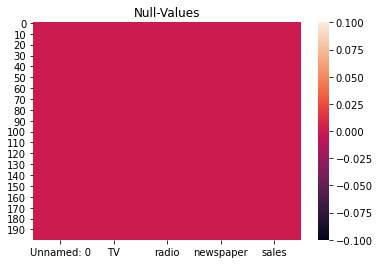

In [8]:
sns.heatmap(df.isnull())
plt.title('Null-Values')
plt.show()

Observation :-

There are no null values.


### Checking the not null values in our dataset.

In [9]:
df.notnull()

,Unnamed: 0,TV,radio,newspaper,sales
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,True
3,True,True,True,True,True
4,True,True,True,True,True
...,...,...,...,...,...
195,True,True,True,True,True
196,True,True,True,True,True
197,True,True,True,True,True
198,True,True,True,True,True


Observation :-

There is no column/row or entity with null value.

### Checking the total number of values in our dataset , if it is not null. 

In [10]:
df.notnull().sum()

Unnamed: 0    200
TV            200
radio         200
newspaper     200
sales         200
dtype: int64

Observation :-

These are the total values placed in the respective columns.
For example :- column -"TV" is having 200 numbers of total values listed in it under the dataset.

- The dataset is uniformly distributed i.e all the rows and columns have equal number of values.

### Obtaining the mean ,median and mode values of all the columns respectively.

In [11]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


# Regression Identication

- The target variable in our dataset is the 'sales' , which ia a continous varible so it is classified as linear regression problem.

# Visual Representation of the data

### Graph for the target variable 'Happiness Score' of the dataset - Univariate Analysis

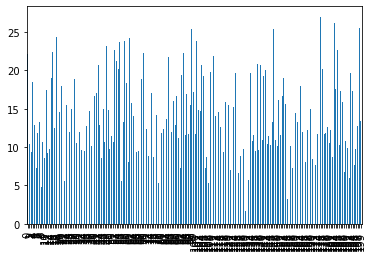

In [12]:
df['sales'].plot.bar()

plt.show()

- The target variable 'sales' is in continous form , it's a linear regression problem.

### Graphical representation of all the attributes of the dataset


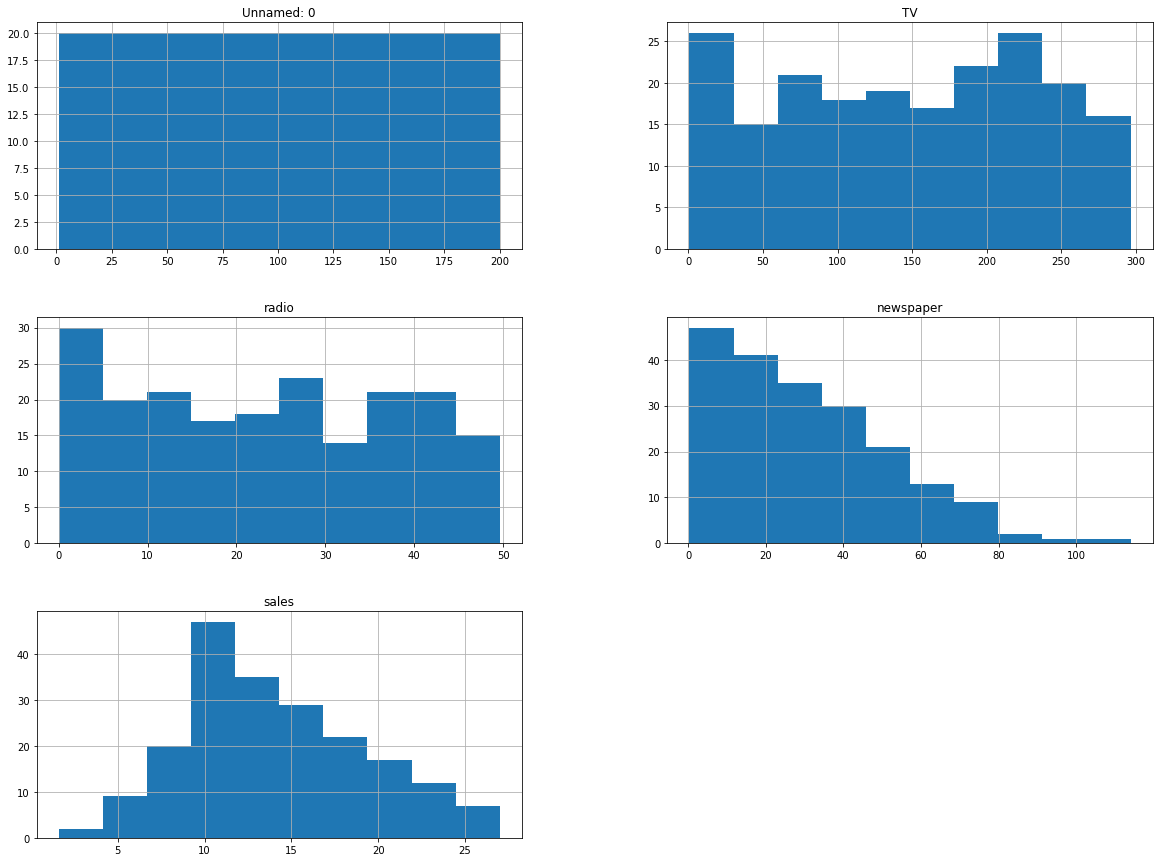

In [13]:
fig = plt.figure(figsize=(20,15)) # univariate analysis on all the attributes of the dataset
ax = fig.gca() 
df.hist(ax=ax)
plt.show()

## Bivariate Analysis 

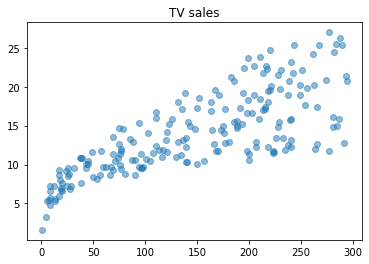

In [63]:
plt.scatter(df['TV'],df['sales'],alpha=0.5) # analysis with 2 variables i.e 2 attributes of the dataset
plt.title('TV sales')
plt.show()

- The graph indicates that over the period of time the sales of tv has increased.

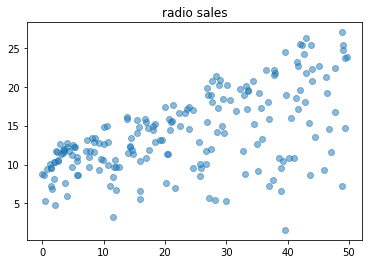

In [64]:
plt.scatter(df['radio'],df['sales'],alpha=0.5) # analysis with 2 variables i.e 2 attributes of the dataset
plt.title('radio sales')
plt.show()

- The graph indicates that the sales of radio was declined as compared to earlier.

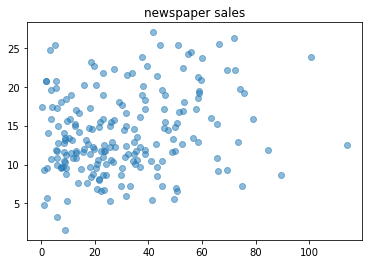

In [16]:
plt.scatter(df['newspaper'],df['sales'],alpha=0.5) # analysis with 2 variables i.e 2 attributes of the dataset
plt.title('newspaper sales')
plt.show()

- The graph indicates that the sales of newspaper was heavily declined as compared to earlier.

## Observing Correlation - Multivariate Analysis

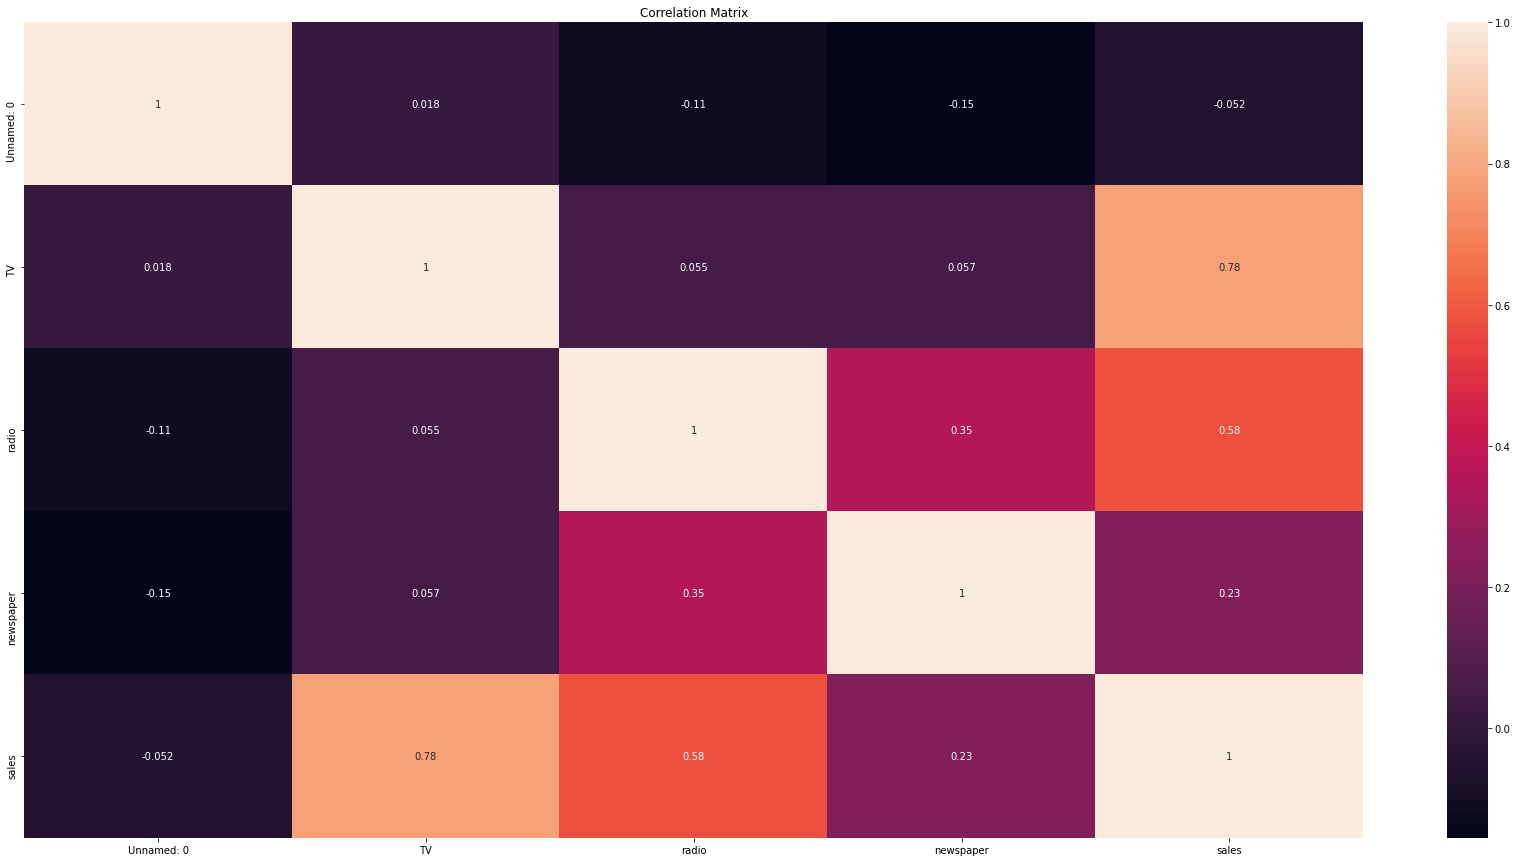

In [17]:
corr_mat=df.corr()

plt.figure(figsize=[30,15])
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.show()

The graph indicates the correlation between the attributes products and sales.
- The darker the shade lower is the correlation between the variables.
- The bright shades has comparatively high and positive correlation with the variables.
- The dark shades represent negative corelation ,if value of one variable increses then the value of other variable decreases or vice-versa.

Let's find the correlation value to see positively and negatively correlated variables.

### Correlation value of the attributes

In [18]:
corr_matrix=df.corr()
corr_matrix['sales'].sort_values(ascending=False)

sales         1.000000
TV            0.782224
radio         0.576223
newspaper     0.228299
Unnamed: 0   -0.051616
Name: sales, dtype: float64

##  Splitting the target variable from the independent variables.



In [65]:
x=df.drop('sales',axis=1)
y=df['sales']

In [66]:
# Checking the skewness in the dataset
x.skew()

Unnamed: 0   -0.006283
TV           -0.082332
radio         0.114842
newspaper     0.650112
dtype: float64

In [67]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)
df_new.head()

,Unnamed: 0,TV,radio,newspaper
0,-2.081121,0.955983,0.969110,1.604196
1,-2.035413,-1.192003,1.046234,0.831044
2,-1.993807,-1.646125,1.372968,1.607052
3,-1.955008,0.142934,1.147332,1.283768
4,-1.918308,0.456452,-0.735026,1.280622


In [22]:
# Checking the skewness in the dataset
x.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
dtype: float64

- The negative skewness indicates longer or flattened tail at the left side.
- The positive skewness indicates lond=ger or falltter tail at the right side.

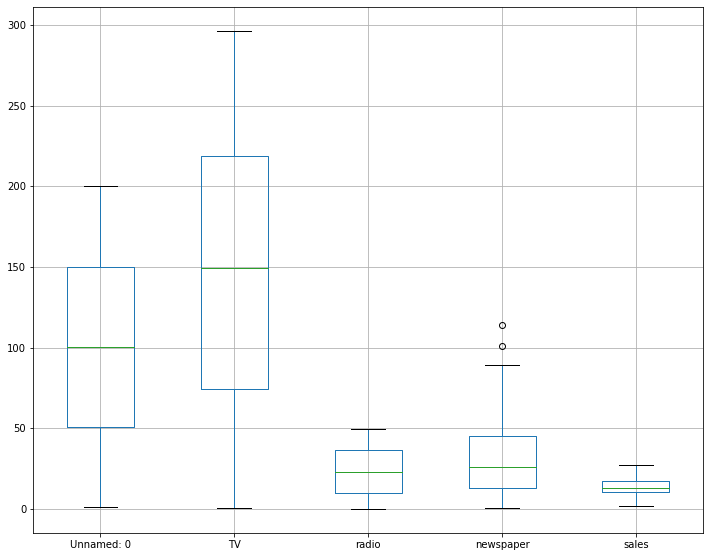

In [23]:
# Plotting boxplots for first 5 columns
df.iloc[:,0:5].boxplot(figsize=(12,10))
plt.subplots_adjust(bottom=0.15)
plt.show()

- Outliers are present in the 'newspaper' variable.

## Removing Outliers

In [24]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.72341210e+00, 9.69852266e-01, 9.81522472e-01, 1.77894547e+00,
        1.55205313e+00],
       [1.70609137e+00, 1.19737623e+00, 1.08280781e+00, 6.69578760e-01,
        6.96046111e-01],
       [1.68877065e+00, 1.51615499e+00, 1.52846331e+00, 1.78354865e+00,
        9.07405869e-01],
       [1.67144992e+00, 5.20496822e-02, 1.21785493e+00, 1.28640506e+00,
        8.60330287e-01],
       [1.65412920e+00, 3.94182198e-01, 8.41613655e-01, 1.28180188e+00,
        2.15683025e-01],
       [1.63680847e+00, 1.61540845e+00, 1.73103399e+00, 2.04592999e+00,
        1.31091086e+00],
       [1.61948775e+00, 1.04557682e+00, 6.43904671e-01, 3.24708413e-01,
        4.27042783e-01],
       [1.60216702e+00, 3.13436589e-01, 2.47406325e-01, 8.72486994e-01,
        1.58039455e-01],
       [1.58484630e+00, 1.61657614e+00, 1.42906863e+00, 1.36042422e+00,
        1.77205942e+00],
       [1.56752558e+00, 6.16042873e-01, 1.39530685e+00, 4.30581584e-01,
        6.57617064e-01],
       [1.55020485e+00, 9.4515

In [25]:
threshold=3
print(np.where(z>3))

(array([ 16, 101]), array([3, 3]))


In [26]:
df_new=df[(z<3).all(axis=1)]
df_new

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [27]:
df=df_new

The target variable 'Happiness Score' is a contionous variable , so we use the Linear Regression method for the machine learning.
- Splitting the traget variable from the dataset as x and y.

In [28]:
x.head()

,Unnamed: 0,TV,radio,newspaper
0,1,230.1,37.8,69.2
1,2,44.5,39.3,45.1
2,3,17.2,45.9,69.3
3,4,151.5,41.3,58.5
4,5,180.8,10.8,58.4


In [29]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [30]:
x.shape

(200, 4)

In [31]:
y.shape

(200,)

## Training and testing different models

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [33]:
x_train.shape

(134, 4)

In [34]:
y_train.shape

(134,)

In [35]:
x_test.shape

(66, 4)

In [36]:
y_test.shape

(66,)

## Testing - Linear Regression model

In [37]:
ln=LinearRegression()
ln.fit(x_train,y_train)

LinearRegression()

In [38]:
ln.coef_

array([-0.00037402,  0.044666  ,  0.19662408,  0.00596564])

In [39]:
ln.intercept_

2.7990206595293436

In [40]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [41]:
ln.score(x_train,y_train)

0.9095400075045317

In [53]:
# predict the value
prediction=ln.predict(x_test)
print('sales :',prediction)

sales : [16.585975   21.21532322 21.69227359 10.78721853 22.24436064 13.30628235
 21.2504897   7.35896941 13.41395576 15.21479112  9.03101674  6.53873996
 14.38551706  8.94580619  9.53158119 12.07825531  8.87587732 16.23384905
 10.31667839 18.8497049  19.79672229 13.69754141 12.43554051 21.57865582
  7.69026184  5.68674887 20.9598931  11.90745906  9.12144274  8.48517263
 12.35724077 10.0227661  21.73331021 12.65125091 18.23409167 20.17501241
 14.19756077 21.01107333 10.89474985  4.43662297  9.60216605 12.49762923
 10.16879519  8.15899632 13.32316067  5.24178782  9.33060279 14.18410081
  8.74319968 11.67710859 15.65671046 11.72808538 13.24771147 11.05045257
  6.41295864  9.85860465  9.4443335  24.324371    7.66332787 12.31212277
 17.55637468 15.28145887 11.4813757  11.15185016 16.6268277   6.89967715]


In [54]:
print('actual sales',y_test)

actual sales 95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
       ... 
97     15.5
31     11.9
12      9.2
35     12.8
119     6.6
Name: sales, Length: 66, dtype: float64


In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print('error :')

print('Mean absolute error :',mean_absolute_error(y_test,prediction))
print('Mean squared error :',mean_squared_error(y_test,prediction))
print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(y_test,prediction)))
print('r2_score value :',r2_score(y_test,prediction))

error :
Mean absolute error : 1.4916509509187863
Mean squared error : 3.7282734331583307
Root Mean Squared Error :  1.9308737486325538
r2_score value : 0.8555434716491412


## Testing - Linear Regression with Lasso and Ridge models

In [45]:
from sklearn.linear_model import Lasso,Ridge

In [46]:
ls=Lasso(alpha=0.0001)
# ls=lasso(alpha=0.1) --> default
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.9095400075024491

In [60]:
Rg=Ridge(alpha=.001)
Rg.fit(x_train,y_train)
Rg.score(x_train,y_train)

0.9095400075045313

# Cross Validation Score for each model

In [62]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(ln,x,y,cv=5)
print('The cross validation score for the Linear Regression model is :',scr.mean())
print('The difference between accuracy and crossvalidation score is :0.02526222303036274.')

The cross validation score for the Linear Regression model is : 0.8842777844741689
The difference between accuracy and crossvalidation score is :0.02526222303036274.


In [58]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(ls,x,y,cv=5)
print('The cross validation score for the Lasso Regression model is :',scr.mean())
print('The difference between accuracy and crossvalidation score is :0.025262030568573124.')

The cross validation score for the Lasso Regression model is : 0.884277976933876
The difference between accuracy and crossvalidation score is :0.025262030568573124.


In [56]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(Rg,x,y,cv=5)
print('The cross validation score for the Ridge Regression model is :',scr.mean())
print('The difference between accuracy and crossvalidation score is :0.025262222676442625.')

The cross validation score for the Ridge Regression model is : 0.8842777848280887
The difference between accuracy and crossvalidation score is :0.025262222676442625.


- The minimum difference between the accuracy score and cross validatio score is for the Linear Regression model (0.02526222303036274) so this is our best model.

## Saving the model

In [51]:
import pickle

filename='picklelnfile.pkl'
pickle.dump(ln,open('picklelnfile','wb'))

In [52]:
saved_model=pickle.load(open('picklelnfile','rb'))
saved_model.predict(x_test)

array([16.585975  , 21.21532322, 21.69227359, 10.78721853, 22.24436064,
       13.30628235, 21.2504897 ,  7.35896941, 13.41395576, 15.21479112,
        9.03101674,  6.53873996, 14.38551706,  8.94580619,  9.53158119,
       12.07825531,  8.87587732, 16.23384905, 10.31667839, 18.8497049 ,
       19.79672229, 13.69754141, 12.43554051, 21.57865582,  7.69026184,
        5.68674887, 20.9598931 , 11.90745906,  9.12144274,  8.48517263,
       12.35724077, 10.0227661 , 21.73331021, 12.65125091, 18.23409167,
       20.17501241, 14.19756077, 21.01107333, 10.89474985,  4.43662297,
        9.60216605, 12.49762923, 10.16879519,  8.15899632, 13.32316067,
        5.24178782,  9.33060279, 14.18410081,  8.74319968, 11.67710859,
       15.65671046, 11.72808538, 13.24771147, 11.05045257,  6.41295864,
        9.85860465,  9.4443335 , 24.324371  ,  7.66332787, 12.31212277,
       17.55637468, 15.28145887, 11.4813757 , 11.15185016, 16.6268277 ,
        6.89967715])